In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
df=pd.read_csv('Demo_Data_Loan.csv')

In [2]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


## This data set is the Classification Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


## Check null value this dataset

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

##  There is no need for this column name "Loan_ID"  in this data set

In [5]:
df=df.drop('Loan_ID', axis=1) 
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


## All string data number convert  code

In [6]:
df['Gender']=df['Gender'].replace(['Male','Female'],[1,0])
df['Married']=df['Married'].replace(['Yes','No'],[1,0])
df['Dependents']=df['Dependents'].replace(['0','2','1','3+'],[0,1,2,3])
df['Education']=df['Education'].replace(['Graduate','Not Graduate'],[1,0])
df['Self_Employed']=df['Self_Employed'].replace(['No','Yes'],[0,1])
df['Property_Area']=df['Property_Area'].replace(['Urban','Semiurban','Rural'],[0,1,2])

## Missing value control 

In [7]:
missing_age=df['Gender'].median()
df.Gender=df.Gender.fillna(missing_age)

missing_Dependents=df['Dependents'].median()
df.Dependents=df.Dependents.fillna(missing_Dependents)

missing_Self_Employed=df['Self_Employed'].median()
df.Self_Employed=df.Self_Employed.fillna(missing_Self_Employed)

missing_LoanAmount=df['LoanAmount'].mean()
df.LoanAmount=df.LoanAmount.fillna(missing_LoanAmount)

missing_Loan_Amount_Term=df['Loan_Amount_Term'].mean()
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(missing_Loan_Amount_Term)

missing_Credit_History=df['Credit_History'].median()
df.Credit_History=df.Credit_History.fillna(missing_Credit_History)

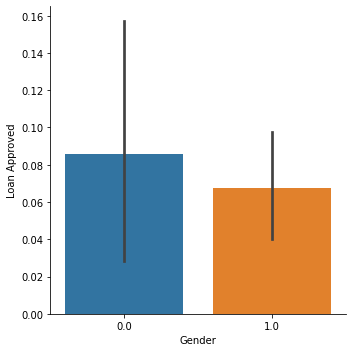

In [8]:
sns.catplot(data=df,x='Gender',y='Loan Approved', kind='bar')

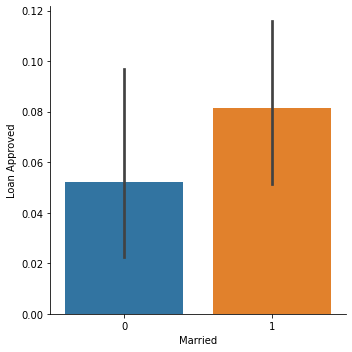

In [9]:
sns.catplot(data=df,x='Married',y='Loan Approved', kind='bar')

In [10]:
df['Married'].value_counts()

1    233
0    134
Name: Married, dtype: int64

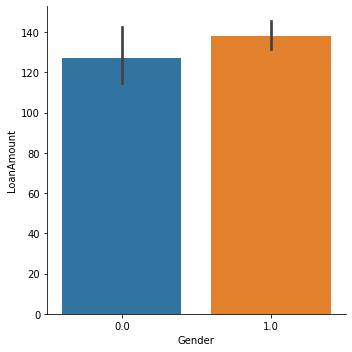

In [11]:
sns.catplot(data=df,x='Gender',y='LoanAmount',kind='bar')

In [12]:
df['Property_Area'].value_counts()

0    140
1    116
2    111
Name: Property_Area, dtype: int64

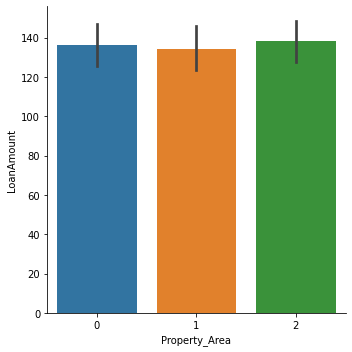

In [13]:
sns.catplot(data=df,x='Property_Area',y='LoanAmount',kind='bar')

In [14]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,0,0
1,1.0,1,2.0,1,0.0,3076,1500,126.0,360.0,1.0,0,0
2,1.0,1,1.0,1,0.0,5000,1800,208.0,360.0,1.0,0,0
3,1.0,1,1.0,1,0.0,2340,2546,100.0,360.0,1.0,0,0
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,0,0


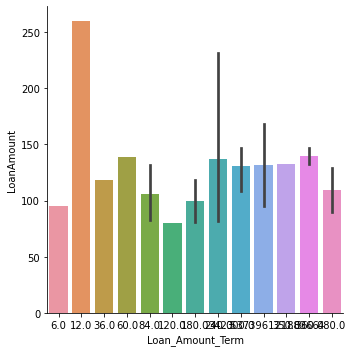

In [15]:
sns.catplot(data=df,x='Loan_Amount_Term',y='LoanAmount',kind='bar')

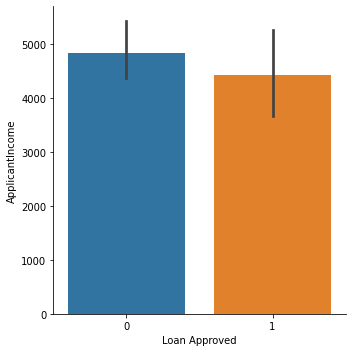

In [16]:
sns.catplot(data=df,y='ApplicantIncome',x='Loan Approved',kind='bar')

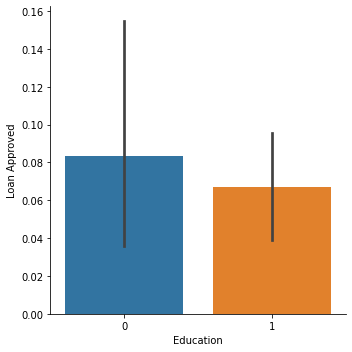

In [17]:
sns.catplot(data=df,x='Education',y='Loan Approved',kind='bar')

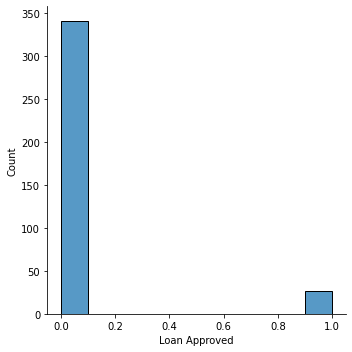

In [18]:
sns.displot(df, x="Loan Approved")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    float64
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    float64
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
 11  Loan Approved      367 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 34.5 KB


In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan Approved        0
dtype: int64

In [21]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.803815,0.771117,0.100817,4805.599455,1569.577657,136.132597,342.537396,0.839237,0.920981,0.070845
std,0.393417,0.482122,1.063393,0.420687,0.301498,4910.685399,2334.232099,60.946040,64.620366,0.367814,0.824337,0.256915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000,1.000000


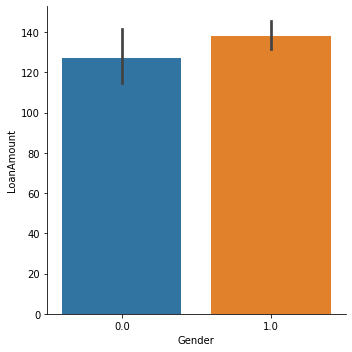

In [22]:
sns.catplot(data=df,x='Gender',y='LoanAmount',kind='bar')

In [23]:
x=df.iloc[:,:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,0
1,1.0,1,2.0,1,0.0,3076,1500,126.0,360.0,1.0,0
2,1.0,1,1.0,1,0.0,5000,1800,208.0,360.0,1.0,0
3,1.0,1,1.0,1,0.0,2340,2546,100.0,360.0,1.0,0
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0,1.0,4009,1777,113.0,360.0,1.0,0
363,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,0
364,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,1.0,1
365,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,2


In [24]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: Loan Approved, Length: 367, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=1)

In [41]:
xtrain.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
283,1.0,0,0.0,0,0.0,9000,0,122.0,360.0,1.0,2
206,1.0,1,2.0,1,0.0,4960,2600,187.0,360.0,1.0,1
91,1.0,1,3.0,1,0.0,13518,0,390.0,360.0,1.0,2
365,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,2


In [40]:
xtest.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
291,1.0,1,1.0,1,0.0,3166,2833,145.0,360.0,1.0,0
331,1.0,1,3.0,1,0.0,9699,0,300.0,360.0,1.0,0
225,0.0,0,0.0,1,0.0,2545,0,74.0,360.0,1.0,0
102,1.0,1,2.0,1,0.0,3901,0,116.0,360.0,1.0,0


In [28]:
from sklearn.svm import SVC
SVM=SVC()

SVM.fit(xtrain,ytrain)
y_pred=SVM.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [29]:
from sklearn import metrics
metrics.accuracy_score(ytest,y_pred)

0.9456521739130435

In [30]:
results = confusion_matrix(ytest, y_pred)
print(results)

[[87  0]
 [ 5  0]]


##### Actully the prediction positive result and actual true output are 87 %, 
##### and prediction positive  result and actual False output  5 %  ,
##### Prediction Negative result and Actual False result  are 0 % , 
##### and prediction Negative result and actual True output  0 %  ,
##### 5 % wrong prediction 

In [31]:
from sklearn import tree

tree=tree.DecisionTreeClassifier()
tree.fit(xtrain,ytrain)
y_pred=tree.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [32]:
metrics.accuracy_score(ytest,y_pred)

0.8043478260869565

In [33]:
results = confusion_matrix(ytest, y_pred)
print(results)

[[74 13]
 [ 5  0]]


##### Actully the prediction positive result and actual true output are 74 %, 
##### and prediction positive  result and actual False output  5 %  ,
##### Prediction Negative result and Actual False result  are 13 % , 
##### and prediction Negative result and actual True output  0 %  ,
##### 5 % wrong prediction

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)
y_pred=rf.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [35]:
metrics.accuracy_score(ytest,y_pred)

0.9347826086956522

In [36]:
results = confusion_matrix(ytest, y_pred)
print(results)

[[86  1]
 [ 5  0]]


##### Actully the prediction positive result and actual true output are 86 %, 
##### and prediction positive  result and actual False output  5 %  ,
##### Prediction Negative result and Actual False result  are 1 % , 
##### and prediction Negative result and actual True output  0 %  ,
##### 5 % wrong prediction

In [37]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()

GNB.fit(xtrain,ytrain)
y_pred=rf.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [38]:
metrics.accuracy_score(ytest,y_pred)

0.9347826086956522

In [39]:
results = confusion_matrix(ytest, y_pred)
print(results)

[[86  1]
 [ 5  0]]


##### Actully the prediction positive result and actual true output are 86 %, 
##### and prediction positive  result and actual False output  5 %  ,
##### Prediction Negative result and Actual False result  are 1 % , 
##### and prediction Negative result and actual True output  0 %  ,
##### 5 % wrong prediction

### So, this dataset's best result is the SVM algorithm
### Accuracy result is 87